In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('prepared_data_2.csv')

In [22]:
df.sort_values(by='AMT_INCOME_TOTAL')

,FLAG_GENDER_MALE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,OCCUPATION_TYPE,College_Education,Currently_Married,Marriage_Status,Paying_Housing,White_Collar,AGE_YR,YRS_WORKED,target_paid_1
2476,0,0,0,0,27000.0,Managers,1,1,Married,1,1,40.0,13.0,0
2475,0,0,0,0,27000.0,Managers,1,1,Married,1,1,40.0,13.0,0
2313,0,0,1,0,32400.0,Managers,0,1,Married,1,1,52.0,15.0,0
1635,0,0,0,0,36000.0,Core staff,0,1,Married,0,1,39.0,1.0,1
1059,0,0,1,0,40500.0,Cleaning staff,0,1,Married,1,0,34.0,13.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,1,1,0,0,1350000.0,Managers,1,1,Married,0,1,35.0,4.0,0
1659,1,1,0,0,1350000.0,Managers,1,1,Married,0,1,35.0,4.0,0
66,1,1,0,0,1350000.0,Managers,1,1,Married,0,1,35.0,4.0,0
67,1,1,0,0,1350000.0,Managers,1,1,Married,0,1,35.0,4.0,0


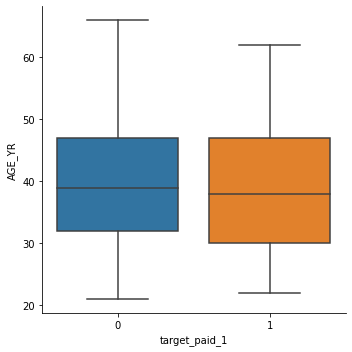

In [29]:
sns.catplot(x='target_paid_1', y='AGE_YR', kind='box',data=df)

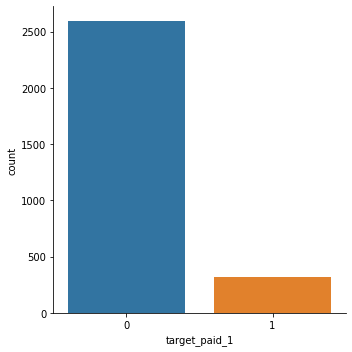

In [42]:
sns.catplot(x='target_paid_1', kind='count',data=df)

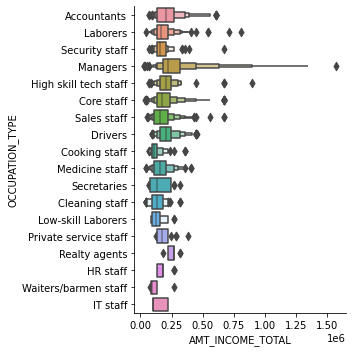

In [45]:
sns.catplot(y='OCCUPATION_TYPE', x='AMT_INCOME_TOTAL', kind='boxen',data=df)

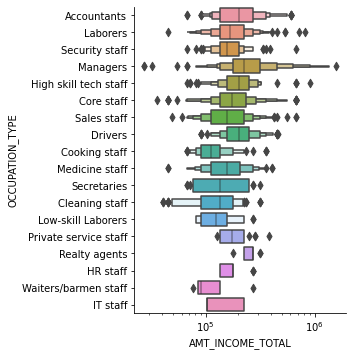

In [53]:

sns.catplot(y='OCCUPATION_TYPE', x='AMT_INCOME_TOTAL', kind='boxen',data=df)
plt.xscale('log')

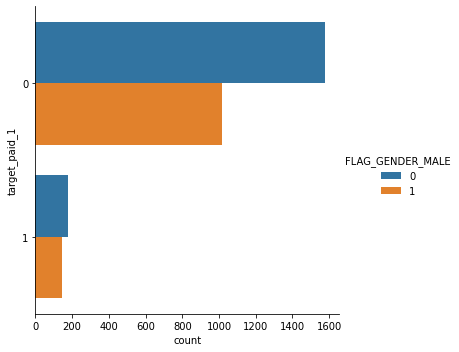

In [65]:
sns.catplot(hue='FLAG_GENDER_MALE', y='target_paid_1', data=df, kind='count')

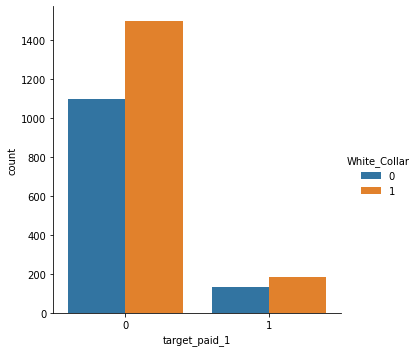

In [71]:
sns.catplot(hue='White_Collar', x='target_paid_1', data=df, kind='count')

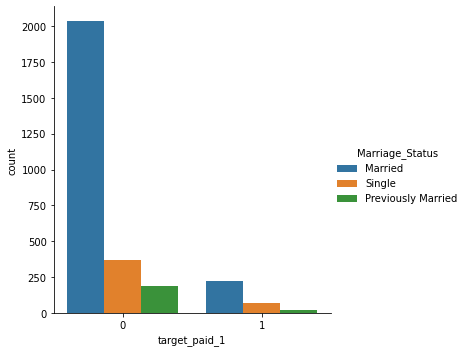

In [75]:
sns.catplot(hue='Marriage_Status', x='target_paid_1', data=df, kind='count')


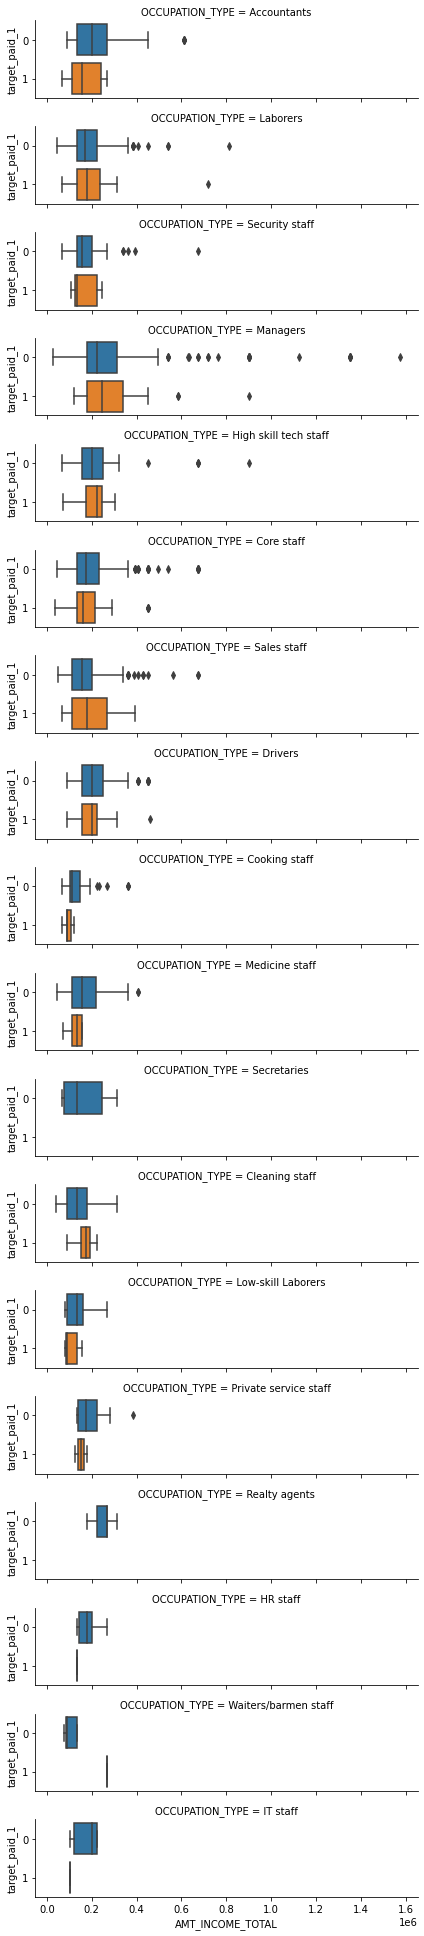

In [80]:
sns.catplot(x='AMT_INCOME_TOTAL', y='target_paid_1', data=df, row='OCCUPATION_TYPE', kind='box', orient='h', height=1.5, aspect=4)

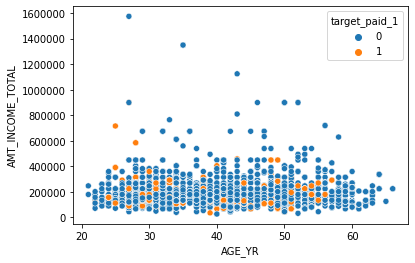

In [25]:
sns.scatterplot(x='AGE_YR', y= 'AMT_INCOME_TOTAL',hue='target_paid_1', data=df)

plt.ticklabel_format(style='plain', axis='both')

In [103]:
df.groupby('College_Education')['target_paid_1'].value_counts(normalize=True)

College_Education  target_paid_1
0                  0                0.895059
                   1                0.104941
1                  0                0.879442
                   1                0.120558
Name: target_paid_1, dtype: float64

In [104]:
df.groupby(["White_Collar", "OCCUPATION_TYPE"] ).count()

FLAG_GENDER_MALE  FLAG_OWN_CAR  \
White_Collar OCCUPATION_TYPE                                         
0            Cleaning staff                       58            58   
             Cooking staff                        81            81   
             Drivers                             249           249   
             Laborers                            693           693   
             Low-skill Laborers                   32            32   
             Private service staff                20            20   
             Security staff                       81            81   
             Waiters/barmen staff                 18            18   
1            Accountants                         139           139   
             Core staff                          441           441   
             HR staff                             13            13   
             High skill tech staff               172           172   
             IT staff                              9             9   
             Managers                            361           361   
             Medicine staff                      159           159   
             Realty agents                         9             9   
             Sales staff                         368           368   
             Secretaries                          10            10   

                                    FLAG_OWN_REALTY  CNT_CHILDREN  \
White_Collar OCCUPATION_TYPE                                        
0            Cleaning staff                      58            58   
             Cooking staff                       81            81   
             Drivers                            249           249   
             Laborers                           693           693   
             Low-skill Laborers                  32            32   
             Private service staff               20            20   
             Security staff                      81            81   
             Waiters/barmen staff                18            18   
1            Accountants                        139           139   
             Core staff                         441           441   
             HR staff                            13            13   
             High skill tech staff              172           172   
             IT staff                             9             9   
             Managers                           361           361   
             Medicine staff                     159           159   
             Realty agents                        9             9   
             Sales staff                        368           368   
             Secretaries                         10            10   

                                    AMT_INCOME_TOTAL  College_Education  \
White_Collar OCCUPATION_TYPE                                              
0            Cleaning staff                       58                 58   
             Cooking staff                        81                 81   
             Drivers                             249                249   
             Laborers                            693                693   
             Low-skill Laborers                   32                 32   
             Private service staff                20                 20   
             Security staff                       81                 81   
             Waiters/barmen staff                 18                 18   
1            Accountants                         139                139   
             Core staff                          441                441   
             HR staff                             13                 13   
             High skill tech staff               172                172   
             IT staff                              9                  9   
             Managers                            361                361   
             Medicine staff                      159  

In [ ]:
#Combine Like Groups 

jobCategories = {
    #White Collar
    'Waiters/barmen staff': 'Restaurant staff', #Waiters has 18
    'Cooking staff': 'Restaurant staff', #Now restaurant has 99,
    #Blue Collar
    'HR staff': 'Office staff', #13
    'Secretaries': 'Office staff', #10
    'IT staff': 'Office staff', #9, Office Staff has 32 Total
    'Realty agents': 'Sales Staff', #Realty agents technically do sales too.
}